# Demos: Lecture 21

## Demo 1: Grover's algorithm

<img src="fig/grover_full.png" width="700px">

In [1]:
import pennylane as qml
import numpy as np

In [2]:
n_bits = 5
special_string = '11111' 

dev = qml.device('default.qubit', wires=n_bits+1)

In [3]:
def hadamard_transform(wires):
    for wire in wires:
        qml.Hadamard(wires=wire)

In [4]:
def oracle():
    qml.MultiControlledX(control_wires=range(n_bits), wires=n_bits, control_values=special_string)

In [5]:
def diffusion():
    hadamard_transform(wires=list(range(n_bits)))
    qml.MultiControlledX(control_wires=range(n_bits), wires=n_bits, control_values='0'*n_bits)
    hadamard_transform(wires=list(range(n_bits)))

In [6]:
@qml.qnode(dev)
def grover(num_its):
    qml.PauliX(wires=n_bits)
    qml.Hadamard(wires=n_bits)
    
    hadamard_transform(wires=list(range(n_bits)))
    
    for _ in range(num_its):
        oracle()
        diffusion()
        
    return qml.probs(wires=range(n_bits))

/Users/nicolas/miniforge3/envs/quantum/lib/python3.10/site-packages/pennylane/ops/qubit/non_parametric_ops.py:2289: UserWarning: The control_wires keyword will be removed soon. Use wires = (control_wires, target_wire) instead. See the documentation for more information.
  warnings.warn(


(<Figure size 1300x700 with 1 Axes>, <Axes: >)

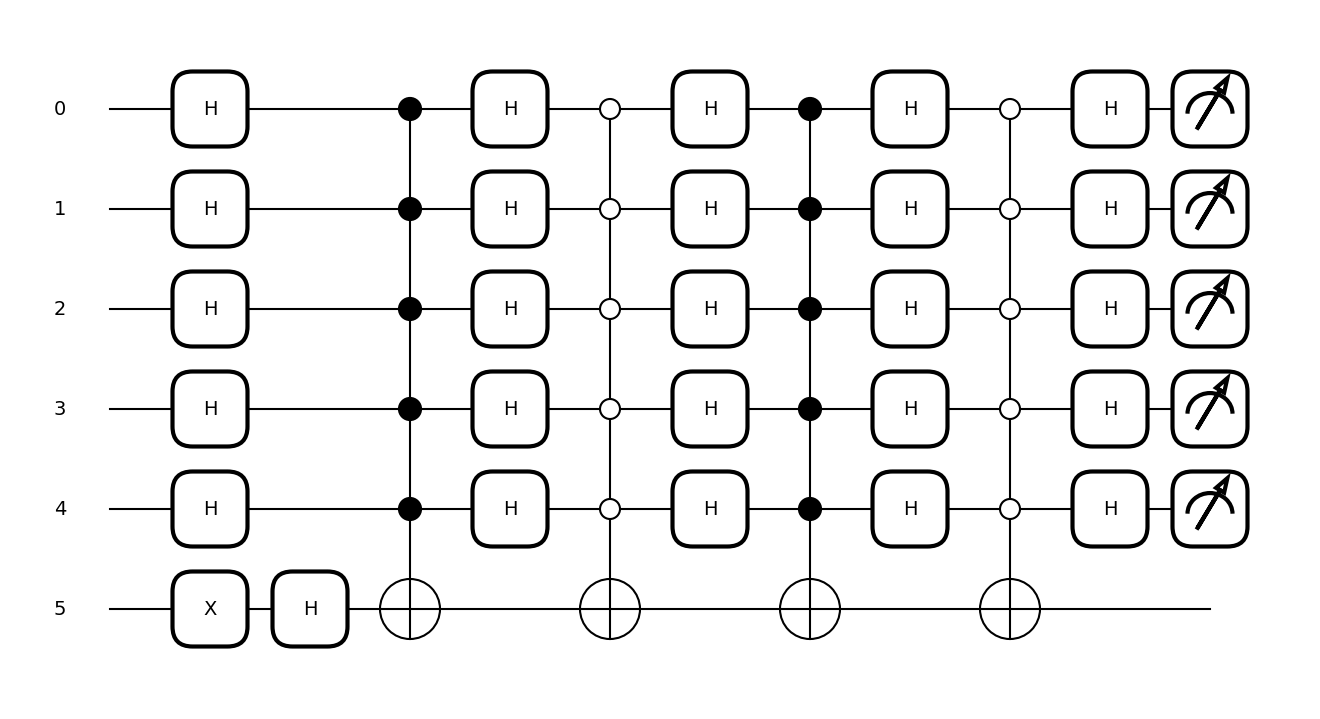

In [8]:
qml.draw_mpl(grover)(2)

For plotting after the implementation

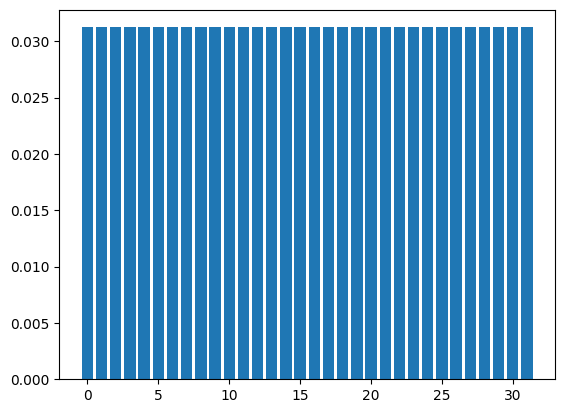

/Users/nicolas/miniforge3/envs/quantum/lib/python3.10/site-packages/pennylane/ops/qubit/non_parametric_ops.py:2289: UserWarning: The control_wires keyword will be removed soon. Use wires = (control_wires, target_wire) instead. See the documentation for more information.
  warnings.warn(


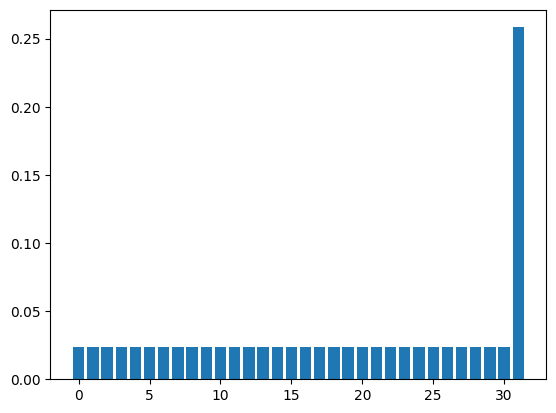

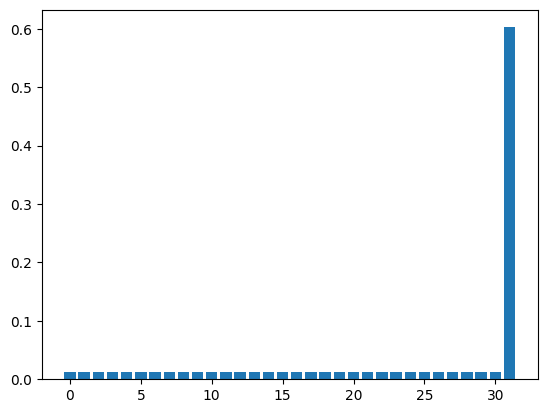

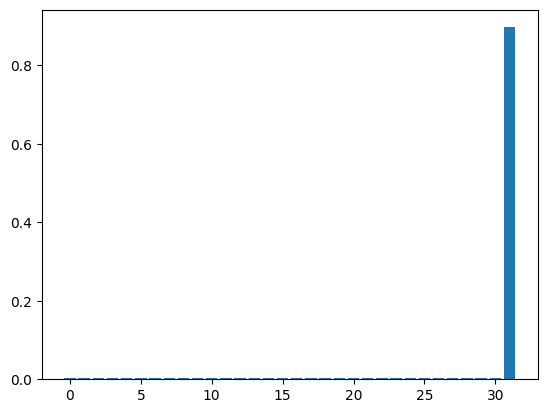

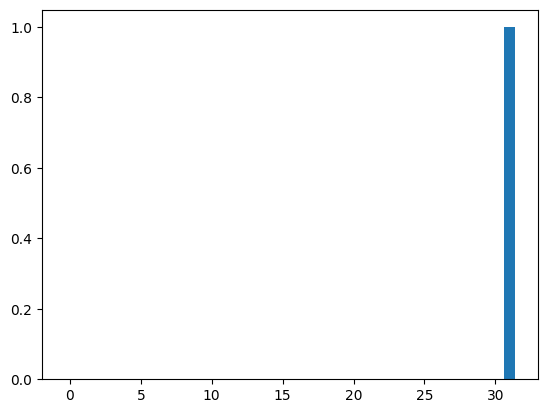

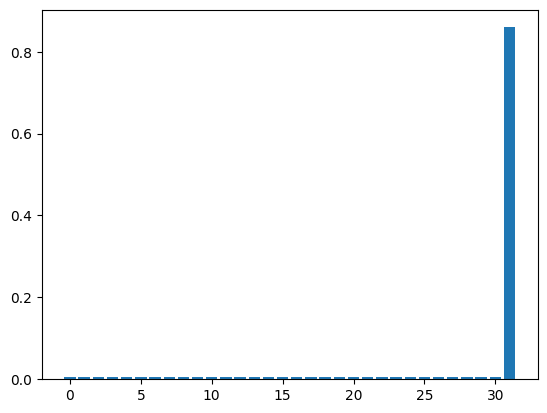

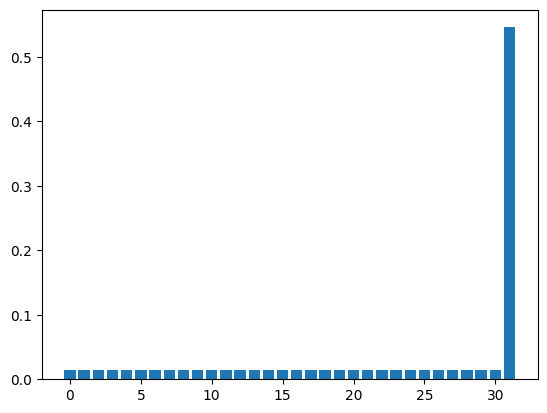

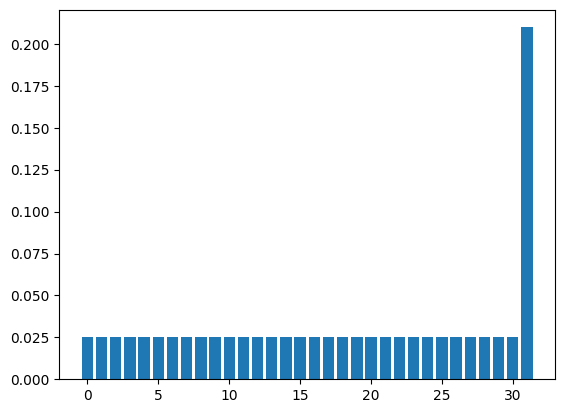

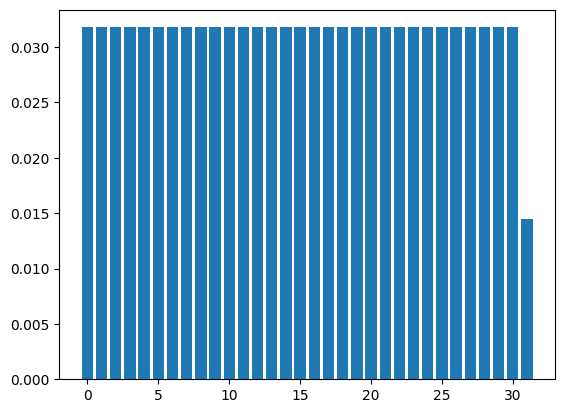

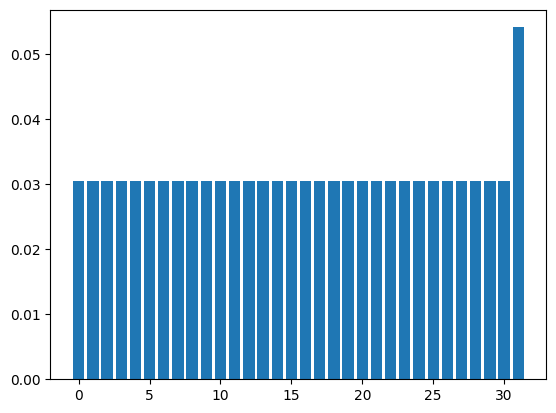

In [7]:
import matplotlib.pyplot as plt

for n in range(10):
    plt.bar(
        list(range(2 ** n_bits)),
        grover(num_its=n)
    )
    plt.show()